In [40]:
import mlrose
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer

def randomized_hill_climb(problem, max_attempts, max_iters, restarts=0):
    start = timer()
    state, fitness, curve = mlrose.random_hill_climb(problem, max_attempts=max_attempts, max_iters=max_iters,
                                                     restarts= restarts, curve=True, random_state=20)
    end = timer()
    time = end - start
    return state, fitness, curve, time

def simulated_annealing(problem, max_attempts, max_iters, schedule=mlrose.GeomDecay()):
    start = timer()
    state, fitness, curve = mlrose.simulated_annealing(problem, max_attempts=max_attempts, max_iters=max_iters,
                                                schedule=schedule, curve=True, random_state=20)
    end = timer()
    time = end - start
    return state, fitness, curve, time

def genetic(problem, max_attempts, max_iters, pop_size=200, mutation_prob=0.1):
    start = timer()
    state, fitness, curve = mlrose.genetic_alg(problem, max_attempts=max_attempts, max_iters=max_iters,
                                        pop_size=pop_size, mutation_prob=mutation_prob, curve=True, random_state=20)
    end = timer()
    time = end - start
    return state, fitness, curve, time

def mimic(problem, max_attempts, max_iters, pop_size=200, keep_pct=0.2):
    start = timer()
    state, fitness, curve = mlrose.mimic(problem, max_attempts=max_attempts, max_iters=max_iters,
                                  pop_size=pop_size, keep_pct=keep_pct, curve=True, random_state=20)
    end = timer()
    time = end - start
    return state, fitness, curve, time

# Define alternative N-Queens fitness function for maximization problem
def queens_max(state):
    # Initialize counter
    fitness_cnt = 0
    # For all pairs of queens
    for i in range(len(state) - 1):
        for j in range(i + 1, len(state)):
            # Check for horizontal, diagonal-up and diagonal-down attacks
            if (state[j] != state[i]) \
                and (state[j] != state[i] + (j - i)) and (state[j] != state[i] - (j - i)):           
                # If no attacks, then increment counter
                fitness_cnt += 1
    return fitness_cnt

def plot_graph(fitness_scores, title):
    plt.switch_backend('Agg')
    %matplotlib inline
    plt.title(title)
    plt.grid()
    for k in fitness_scores.keys():
        plt.plot(fitness_scores[k], label=k)
    plt.legend(loc='lower right')
    plt.xlabel('# of Interations')
    plt.ylabel('Fitness value')
    plt.show()
    plt.clf()
    
def plot_bar(time_scores, algorithms, title):
    y_pos = np.arange(len(algorithms))
    plt.bar(y_pos, time_scores, align='center', alpha=0.5)
    plt.xticks(y_pos, algorithms)
    plt.ylabel('Time in Seconds')
    plt.title(title)
    plt.show()
    plt.clf()

In [ ]:
## Travelling saleperson Problem

## N-Queens optimization problem

In [44]:
max_attempts_list = [10, 20, 50]
max_iters = 1000
problem_size = 100
results = {10: [{'rhc': [],'sa': [],'ga': [],'mimic': []},[]], 
           20: [{'rhc': [],'sa': [],'ga': [],'mimic': []},[]], 
           50: [{'rhc': [],'sa': [],'ga': [],'mimic': []},[]]}
algorithms = ('RHC', 'SA', 'Genetic', 'MIMIC')

#queens_fitness = mlrose.Queens()
queens_fitness = mlrose.CustomFitness(queens_max)
queens_problem = mlrose.DiscreteOpt(length = problem_size, fitness_fn = queens_fitness, maximize = True, max_val = problem_size)

for max_attempts in max_attempts_list:
    best_state, best_fitness, fitness_curve, time = randomized_hill_climb(queens_problem, max_attempts, max_iters)
    results[max_attempts][0]['rhc'] = fitness_curve
    results[max_attempts][1].append(time)
    
    best_state, best_fitness, fitness_curve, time = simulated_annealing(queens_problem, max_attempts, max_iters)
    results[max_attempts][0]['sa'] = fitness_curve
    results[max_attempts][1].append(time)
    
    best_state, best_fitness, fitness_curve, time = genetic(queens_problem, max_attempts, max_iters)
    results[max_attempts][0]['ga'] = fitness_curve
    results[max_attempts][1].append(time)
    
    best_state, best_fitness, fitness_curve, time = mimic(queens_problem, max_attempts, max_iters)
    results[max_attempts][0]['mimic'] = fitness_curve
    results[max_attempts][1].append(time)

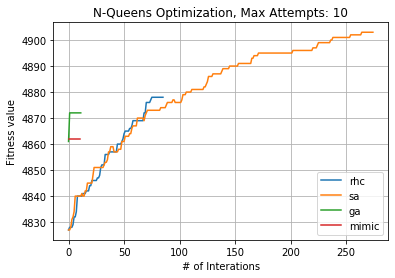

[0.9223761069988541, 3.0617836579986033, 20.269779751997703, 70.75706772600097]


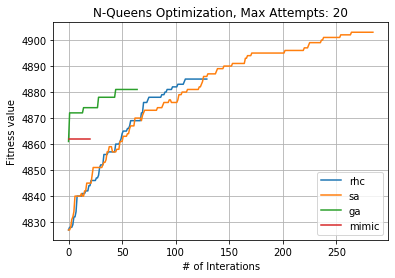

[1.2776910430002317, 3.0407759160007117, 104.41199902299923, 135.44309555600194]


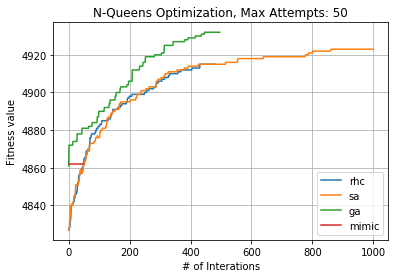

[4.541491954001685, 10.288961310001469, 777.8324260360023, 363.42568617100187]


<Figure size 432x288 with 0 Axes>

In [45]:
# Fill the empty values
#for k, v in fitness_scores.items():
#    values = [v[-1]] * (max_iters - (len(v)))
#    fitness_scores[k] = np.append(v, values)
for k, v in results.items():
    plot_graph(v[0],"N-Queens Optimization, Max Attempts: {}".format(k))
    print(v[1])
    plot_bar(v[1], algorithms, "N-Queens Optimization Time, Max Attempts: {}".format(k))